In [8]:
import pandas as pd
from IPython.display import Image

# Introduction to Data Science - Data Analysis with Jupyter

Brief overview of this module:
1. History of Data Science
2. Goals and Appliactions of Data Science
3. Why Jupyter?
4. Interactive Exercise

## History of Data Science
* In the dot com bubble of 1998-2000, hard drives became really cheap. Corporations and govts started buying lots of them. Once they had a lot of available disk space, they naturally started recording lots of data. At any point in time, more than 90% of the world’s data has been created in the last 2 years.
* To deal with the explosion in quantity and size of data, cloud storage solutions were created because most companies didn’t want to store and manage their own data. This lead to even more ubiquitous access to storage space.
* Existing paradigms of data analysis and statistics were no longer applicable as the quantity of data was too large for the algorithms to handle
* Out of this need arose the modern field of “Data Science” - a mashup of data engineering, statistics, algorithms, visualization and domain expertise. Legend has it the term “data science” was coined by the leads of data analytics leaders at LinkedIn and Facebook in 2008).
* The first major innovation to tackle analyzing data at that enormous scale (soon to be called “Big Data”) was MapReduce (Hadoop) - a technique that allows the use of lots of off-the-shelf hardware to parallelize and distribute algorithms on vast quantities of data. Instead of data coming to the algorithm, the algorithm goes to the data.


## Goals & Applications of Data Science
* Defining metrics and monitoring them (Business Intelligence usecase)
* Answering questions to make decisions (Sri use case)
* Understanding cause-effect relationships (A/B test use case)
* Predicting the future based on the past (Forecast use case)
* Using knowledge of the past to automate decision-making (Auto-dispatch use case)
----
* Finding similarity between people or objects and using that for personalization (Netflix use case)
* Creating new information based on existing information (GAN use case)
* … and many more



**Fields that have been profoundly impacted by Data Science:**
* Search
* Social Media
* Transport & Logistics
* Fashion
* Vehicles
* Photography
* Marketing/Advertising
* Media/TV
* E-Commerce
* **Elections...**


## Why Jupyter?

* Fetch-then-analyze, rather than analyze-then-fetch
* Even when you have specific questions in mind that need to be answered, often exploration may be warranted
* It's much faster to do math/statistics in Python than in SQL
* Jupyter = Excel on steroids, with all the machine-learning/statitics firepower backed by a highly optimized library for vector arithmetic.

## Introduction to pandas
Pandas is our workhorse for data analysis, transformation and exploration. It provides a range of convenience functions for loading, manipulating and exploring data.

There are two underlying data structures that Pandas uses:
* Series - this is the equivalent of a SQL column (1-D array)
* DataFrame - this is the equivalent of a SQL table with rows and columns (2-D array). The columns can be named, and the rows have an index.

A DataFrame is a collection (technically, a dictionary) of Series.

In [6]:
pd.Series(["This", 
           "is", 
           "a", 
           "pandas", 
           "series"])

0      This
1        is
2         1
3    pandas
4    series
dtype: object

In [23]:
df = pd.DataFrame([{"name": "John Doe",
               "age": 30},
              {"name": "Jane Doe",
               "age": 25}])
df

,age,name
0,30,John Doe
1,25,Jane Doe


In [11]:
# The same dataframe
pd.DataFrame({
    "name":['John Doe', "Jane Doe"],
    "age": [30, 25]
})

,name,age
0,John Doe,30
1,Jane Doe,25


In [12]:
# The same dataframe, again
pd.DataFrame([
    ("John Doe", 30),
    ("Jane Doe", 25)
], columns=['name', 'age'])

,name,age
0,John Doe,30
1,Jane Doe,25


In [18]:
# a column of the dataframe is a Series
df['name']

0    John Doe
1    Jane Doe
Name: name, dtype: object

In [19]:
# indexing into a row of a dataframe
df.loc[0]

age           30
name    John Doe
Name: 0, dtype: object

In [25]:
# filtering a dataframe by some clause - like SQL WHERE clause
df[df['age']>25]

,age,name
0,30,John Doe


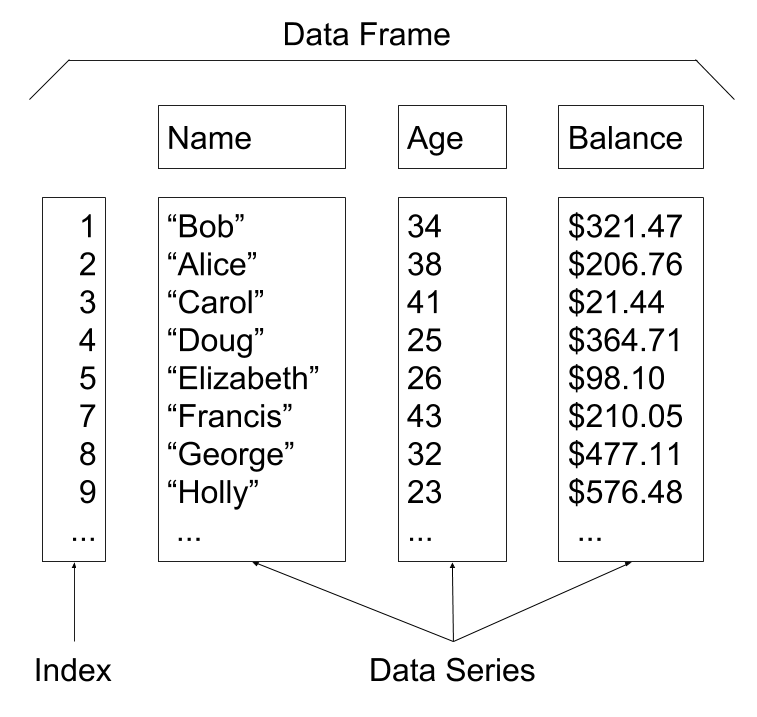

In [9]:
Image(filename='images/Data_Frame_Data_Series.png') 

### Operations in Pandas
  
Pandas provides a "batteries-included" basic data analysis:
  - **Loading data:** `read_csv`, `read_table`, `read_sql`, and `read_html`
  - **Selection, filtering, and aggregation** (i.e. SQL-type operations): There's a special syntax for `SELECT`ing.  There's the `merge` method for `JOIN`ing.  There's also an easy syntax for what in SQL is a mouthful: Creating a new column whose value is computed from another column 
  - **"Pivot table" style aggregation**
  - **Null handling**
  - **Basic statistics:** e.g. `mean`, `median`, `max`, `min`, and the convenient `describe`.
  - **Plugging into more advanced analytics:** Like feeding into `sklearn` for machine learning
  - **Visualization:** For instance `plot` and `hist`.
  

Topics to cover:
* Loading data
* Filtering data
* Indexing rows and columns
* Creating new columns
* Operations on Series
* Summary statistics
* Merging dataframes
* Group by and aggregation
* Plotting
* Tie-ing it all together

## Let's try it on some real data
We have two related datasets here that derive from the 2016 US Census. US Census data is organized by "Census block groups". The first dataset maps Census Block groups to the corresponding State and County. The second dataset is about visits made by people to different Census Block Groups, based on mobile phone location data.

In [32]:
df_codes = pd.read_csv('cbg_fips_codes.csv')
df_codes.head()

,state,state_fips,county_fips,county,class_code
0,AL,1,1,Autauga County,H1
1,AL,1,3,Baldwin County,H1
2,AL,1,5,Barbour County,H1
3,AL,1,7,Bibb County,H1
4,AL,1,9,Blount County,H1


In [31]:
df_patterns = pd.read_csv('cbg_patterns.csv')
df_patterns.head()

,census_block_group,date_range_start,date_range_end,raw_visit_count,raw_visitor_count,visitor_home_cbgs,visitor_work_cbgs,distance_from_home,related_same_day_brand,related_same_month_brand,top_brands,popularity_by_hour,popularity_by_day
0,1.005951e+10,1538352000,1541030400,75122.0,18314.0,"{""010059501003"":127,""010059509001"":111,""010059...","{""010059501003"":109,""010810407002"":62,""0108104...",194724.0,"[""Chick-fil-A"",""mcdonalds"",""Marathon Petroleum...","[""walmart"",""mcdonalds"",""Dollar General"",""Chick...","[""CrossFit"",""Health Mart"",""Coldwell Banker""]","[2617,2457,2403,2519,2646,3007,3886,7566,5508,...","{""Monday"":12000,""Tuesday"":12224,""Wednesday"":10..."
1,1.009051e+10,1538352000,1541030400,95649.0,38942.0,"{""010730113021"":210,""010090506022"":205,""010090...","{""010890111001"":271,""010730045001"":269,""010439...",120587.0,"[""Shell Oil"",""mcdonalds"",""Chick-fil-A"",""Chevron""]","[""walmart"",""mcdonalds"",""Shell Oil"",""Chick-fil-...",[],"[6556,6325,6222,6355,6586,7350,8568,8099,7378,...","{""Monday"":12125,""Tuesday"":12984,""Wednesday"":12..."
2,1.047957e+10,1538352000,1541030400,14009.0,3039.0,"{""010479567011"":67,""010479567021"":60}","{""010479567021"":52}",67774.0,"[""Dollar General""]","[""walmart"",""Dollar General"",""mcdonalds"",""Chevr...","[""Dollar General""]","[807,790,796,786,851,951,1134,1797,1355,1241,1...","{""Monday"":2314,""Tuesday"":2340,""Wednesday"":2195..."
3,1.069040e+10,1538352000,1541030400,128169.0,25418.0,"{""010690402013"":370,""010690402011"":322,""010690...","{""010690402024"":313,""010690415004"":203,""010450...",42684.0,"[""Chick-fil-A"",""Sam's Club"",""Dollar General"",""...","[""walmart"",""Dollar General"",""mcdonalds"",""Marat...","[""Chick-fil-A"",""Sam's Club"",""Olive Garden"",""mc...","[2121,1828,1784,1704,1861,2373,3730,7497,7093,...","{""Monday"":21141,""Tuesday"":21143,""Wednesday"":17..."
4,1.073011e+10,1538352000,1541030400,51453.0,9499.0,"{""010090507001"":183,""010730113021"":167,""010730...","{""010730045001"":140,""010730027001"":123,""010730...",18878.0,"[""Chevron"",""Daylight Donuts"",""walmart""]","[""walmart"",""Chevron"",""Dollar General"",""Shell O...","[""Chevron"",""CrossFit""]","[3804,3716,3686,3672,3735,4115,4855,5946,4526,...","{""Monday"":8402,""Tuesday"":8414,""Wednesday"":8550..."
